In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
path = '/gdrive/My Drive/ML:Pilot/Assignments/Data/Iris.csv'
raw_data = pd.read_csv(path)
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
raw_data.shape

(150, 6)

In [5]:
y = raw_data.iloc[:,5:]
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y["Species"] = labelencoder.fit_transform(y["Species"])

y.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Species
0,0
1,0
2,0
3,0
4,0


In [7]:
y.shape

(150, 1)

In [8]:
x = raw_data.iloc[:,:5]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [9]:
x.shape, y.shape

((150, 5), (150, 1))

In [0]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, shuffle = False)

In [11]:
x_train.shape, x_test.shape

((112, 5), (38, 5))

In [12]:
y_train.shape, y_test.shape

((112, 1), (38, 1))

In [0]:
x_train = np.array(x_train)
y_train = np.array(y_train)


In [14]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ('newton-cg','liblinear','saga'), 'C':[0.001, 10]}

model = LogisticRegression(penalty = 'l2', n_jobs = -2, max_iter = 1000)

a = GridSearchCV(model, parameters, n_jobs = -2)
a.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.001, 10],
                         'solver': ('newton-cg', 'liblinear', 'saga')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
training_score = a.score(x_train, y_train)
y_pred = a.predict(x_train)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2])

In [17]:
from sklearn.metrics import classification_report

cr =classification_report(y_train,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      1.00      0.97        50
           2       1.00      0.75      0.86        12

    accuracy                           0.97       112
   macro avg       0.98      0.92      0.94       112
weighted avg       0.97      0.97      0.97       112



In [18]:
from sklearn.metrics import confusion_matrix

m = confusion_matrix(y_train,y_pred)
print(m)


[[50  0  0]
 [ 0 50  0]
 [ 0  3  9]]


Text(0.5, 1, 'Training accuracy score: 0.9732142857142857')

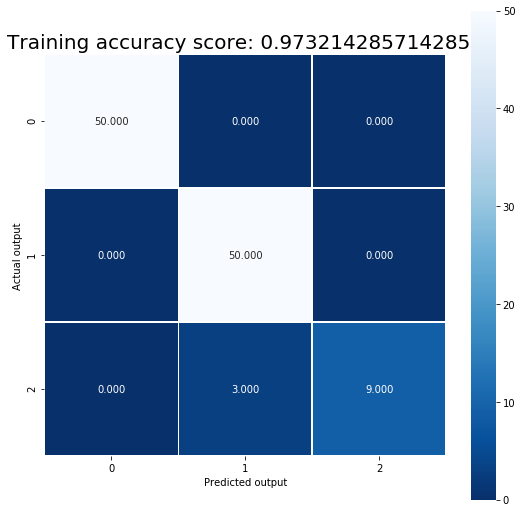

In [19]:
import seaborn as sns
plt.figure(figsize = (9,9))
sns.heatmap(m, annot = True, fmt='.3f', linewidth=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual output');
plt.xlabel('Predicted output');
sample_title = 'Training accuracy score: {0}'.format(training_score)
plt.title(sample_title, size = 20)

In [20]:
x_test.shape, y_test.shape

((38, 5), (38, 1))

In [0]:
pred = a.predict(x_test)

In [22]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
score = a.score(x_test, y_test)
print(score)

0.9473684210526315


In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics 

In [25]:
cm = metrics.confusion_matrix(y_test,pred)
print(cm)

[[ 0  0]
 [ 2 36]]


Text(0.5, 1, '  Test accuracy score: 0.9473684210526315')

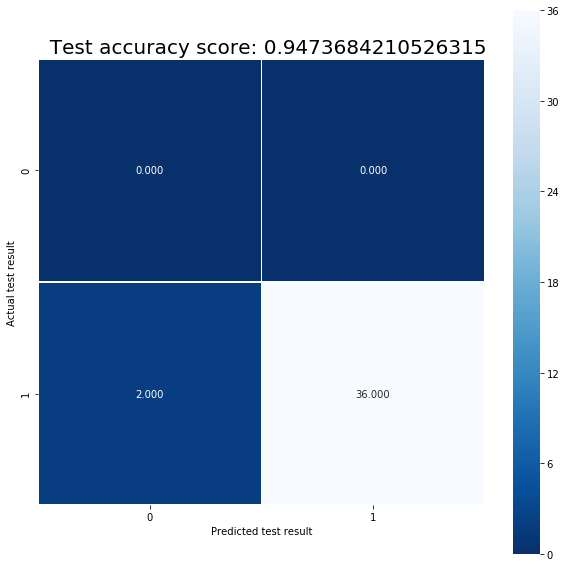

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidth = .5, square = True, cmap = "Blues_r");
plt.ylabel('Actual test result');
plt.xlabel('Predicted test result');
title = '  Test accuracy score: {0}'.format(score)
plt.title(title, size = 20)